In [1]:
# #plot epochs


# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras.optimizers import Adam
# import numpy as np
# import matplotlib.pyplot as plt

# # Load MNIST dataset
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# # Select 10,000 examples (1,000 from each class) to speed up training
# selected_indices = []
# for i in range(10):
#     indices = np.where(y_train == i)[0][:1000]
#     selected_indices.extend(indices)
# selected_indices = np.array(selected_indices)
# x_train = x_train[selected_indices]
# y_train = y_train[selected_indices]

# # Normalize the data
# def normalize(data):
#     # get mean and std.
#     mean = np.mean(data, axis=0)
#     std_dev = np.std(data, axis=0)

#     # reenforce the division not 0
#     std_dev[std_dev == 0] = 1

#     #  x = (x-mean) / std
#     data = (data - mean) / std_dev
#     return data

# x_train = normalize(x_train.reshape(-1, 784))
# x_test = normalize(x_test.reshape(-1, 784))

# # Convert labels to one-hot encoding
# def preprocessY(labels):
#     return tf.one_hot(labels, depth=10)

# y_train = preprocessY(y_train)
# y_test = preprocessY(y_test)

# # Add noise to labels
# def noisyY(labels, noise_ratio):
#     num_noisy = int(len(labels) * noise_ratio)
#     noisy_indices = np.random.choice(len(labels), num_noisy, replace=False)
#     labels = labels.numpy()  # Convert tensor to numpy for easy manipulation
#     for idx in noisy_indices:
#         new_label = np.random.randint(0, 10)
#         labels[idx] = tf.one_hot(new_label, depth=10)
#     return tf.convert_to_tensor(labels, dtype=tf.float32)

# # Parameters
# width_grid = [1, 5, 15, 35]
# dropout_grid = [0.9, 0.75, 0.5, 0]
# epochs = 80
# batch_size = 64

# # Function to build model
# def tf_NeuralNetwork(hidden_units, dropout_rate):
#     model = tf.keras.models.Sequential([
#         Flatten(input_shape=(784,)),
#         Dense(hidden_units, activation='relu', kernel_initializer='he_normal'),
#         Dropout(dropout_rate),
#         Dense(10, activation='softmax')
#     ])
#     return model

# # Training models and storing final results (original dataset)
# results = []
# for p in dropout_grid:
#     for k in width_grid:
#         model = tf_NeuralNetwork(hidden_units=k, dropout_rate=p)
#         model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
#         history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
#         final_train_acc = history.history['accuracy'][-1]
#         final_val_acc = history.history['val_accuracy'][-1]
#         results.append({'k': k, 'p': p, 'train_acc': final_train_acc, 'val_acc': final_val_acc})

# # Add noise to the labels (50% noise)
# y_train_noisy = noisyY(y_train, noise_ratio=0.5)

# # Training models and storing final results (noisy dataset)
# noisy_results = []
# for p in dropout_grid:
#     for k in width_grid:
#         model = tf_NeuralNetwork(hidden_units=k, dropout_rate=p)
#         model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
#         history = model.fit(x_train, y_train_noisy, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
#         final_train_acc = history.history['accuracy'][-1]
#         final_val_acc = history.history['val_accuracy'][-1]
#         noisy_results.append({'k': k, 'p': p, 'train_acc': final_train_acc, 'val_acc': final_val_acc})

# # Plotting results (original dataset)
# # Plot training accuracy vs width (k) for different p on the same plot (original dataset)
# plt.figure(figsize=(10, 6))
# for p in dropout_grid:
#     train_accuracies = [result['train_acc'] for result in results if result['p'] == p]
#     plt.plot(width_grid, train_accuracies, label=f"p={p}")

# plt.xlabel('Width (k)')
# plt.ylabel('Training Accuracy')
# plt.title('Training Accuracy vs Width (k) for Different Dropout Rates - Original Dataset')
# plt.legend()
# plt.show()

# # Plot test accuracy vs width (k) for different p on the same plot (original dataset)
# plt.figure(figsize=(10, 6))
# for p in dropout_grid:
#     test_accuracies = [result['val_acc'] for result in results if result['p'] == p]
#     plt.plot(width_grid, test_accuracies, label=f"p={p}")

# plt.xlabel('Width (k)')
# plt.ylabel('Test Accuracy')
# plt.title('Test Accuracy vs Width (k) for Different Dropout Rates - Original Dataset')
# plt.legend()
# plt.show()

# # Plotting results (noisy dataset)
# # Plot training accuracy vs width (k) for different p on the same plot (noisy dataset)
# plt.figure(figsize=(10, 6))
# for p in dropout_grid:
#     train_accuracies = [result['train_acc'] for result in noisy_results if result['p'] == p]
#     plt.plot(width_grid, train_accuracies, label=f"p={p}")

# plt.xlabel('Width (k)')
# plt.ylabel('Training Accuracy')
# plt.title('Training Accuracy vs Width (k) for Different Dropout Rates - Noisy Dataset')
# plt.legend()
# plt.show()

# # Plot test accuracy vs width (k) for different p on the same plot (noisy dataset)
# plt.figure(figsize=(10, 6))
# for p in dropout_grid:
#     test_accuracies = [result['val_acc'] for result in noisy_results if result['p'] == p]
#     plt.plot(width_grid, test_accuracies, label=f"p={p}")

# plt.xlabel('Width (k)')
# plt.ylabel('Test Accuracy')
# plt.title('Test Accuracy vs Width (k) for Different Dropout Rates - Noisy Dataset')
# plt.legend()
# plt.show()


In [2]:
# # V2_ Doesnt track epoch
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras.optimizers import Adam
# import numpy as np
# import matplotlib.pyplot as plt

# # Load MNIST dataset
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# # Select 10,000 examples (1,000 from each class) to speed up training
# selected_indices = []
# for i in range(10):
#     indices = np.where(y_train == i)[0][:1000]
#     selected_indices.extend(indices)
# selected_indices = np.array(selected_indices)
# x_train = x_train[selected_indices]
# y_train = y_train[selected_indices]

# # Normalize the data
# def normalize(data):
#     # get mean and std.
#     mean = np.mean(data, axis=0)
#     std_dev = np.std(data, axis=0)

#     # reenforce the division not 0
#     std_dev[std_dev == 0] = 1

#     #  x = (x-mean) / std
#     data = (data - mean) / std_dev
#     return data

# x_train = normalize(x_train.reshape(-1, 784))
# x_test = normalize(x_test.reshape(-1, 784))

# # Convert labels to one-hot encoding
# def preprocessY(labels):
#     return tf.one_hot(labels, depth=10)

# y_train = preprocessY(y_train)
# y_test = preprocessY(y_test)

# # Add noise to labels
# def noisyY(labels, noise_ratio):
#     num_noisy = int(len(labels) * noise_ratio)
#     noisy_indices = np.random.choice(len(labels), num_noisy, replace=False)
#     labels = labels.numpy()  # Convert tensor to numpy for easy manipulation
#     for idx in noisy_indices:
#         new_label = np.random.randint(0, 10)
#         labels[idx] = tf.one_hot(new_label, depth=10)
#     return tf.convert_to_tensor(labels, dtype=tf.float32)

# # Parameters
# width_grid = [1, 5, 15, 35]
# dropout_grid = [0.9, 0.75, 0.5, 0]
# epochs = 80
# batch_size = 64

# # Function to build model
# def tf_NeuralNetwork(hidden_units, dropout_rate):
#     model = tf.keras.models.Sequential([
#         Flatten(input_shape=(784,)),
#         Dense(hidden_units, activation='relu', kernel_initializer='he_normal'),
#         Dropout(dropout_rate),
#         Dense(10, activation='softmax')
#     ])
#     return model

# # Training models and storing final results (original dataset)
# results = []
# for p in dropout_grid:
#     for k in width_grid:
#         model = tf_NeuralNetwork(hidden_units=k, dropout_rate=p)
#         model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
#         history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
#         final_train_acc = history.history['accuracy'][-1]
#         final_val_acc = history.history['val_accuracy'][-1]
#         results.append({'k': k, 'p': p, 'train_acc': final_train_acc, 'val_acc': final_val_acc})

# # Add noise to the labels (50% noise)
# y_train_noisy = noisyY(y_train, noise_ratio=0.5)

# # Training models and storing final results (noisy dataset)
# noisy_results = []
# for p in dropout_grid:
#     for k in width_grid:
#         model = tf_NeuralNetwork(hidden_units=k, dropout_rate=p)
#         model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
#         history = model.fit(x_train, y_train_noisy, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
#         final_train_acc = history.history['accuracy'][-1]
#         final_val_acc = history.history['val_accuracy'][-1]
#         noisy_results.append({'k': k, 'p': p, 'train_acc': final_train_acc, 'val_acc': final_val_acc})

# # Plotting results (original dataset)
# # Plot training accuracy vs width (k) for different p on the same plot (original dataset)
# plt.figure(figsize=(10, 6))
# for p in dropout_grid:
#     train_accuracies = [result['train_acc'] for result in results if result['p'] == p]
#     plt.plot(width_grid, train_accuracies, label=f"p={p}")

# plt.xlabel('Width (k)')
# plt.ylabel('Training Accuracy')
# plt.title('Training Accuracy vs Width (k) for Different Dropout Rates - Original Dataset')
# plt.legend()
# plt.show()

# # Plot test accuracy vs width (k) for different p on the same plot (original dataset)
# plt.figure(figsize=(10, 6))
# for p in dropout_grid:
#     test_accuracies = [result['val_acc'] for result in results if result['p'] == p]
#     plt.plot(width_grid, test_accuracies, label=f"p={p}")

# plt.xlabel('Width (k)')
# plt.ylabel('Test Accuracy')
# plt.title('Test Accuracy vs Width (k) for Different Dropout Rates - Original Dataset')
# plt.legend()
# plt.show()

# # Plotting results (noisy dataset)
# # Plot training accuracy vs width (k) for different p on the same plot (noisy dataset)
# plt.figure(figsize=(10, 6))
# for p in dropout_grid:
#     train_accuracies = [result['train_acc'] for result in noisy_results if result['p'] == p]
#     plt.plot(width_grid, train_accuracies, label=f"p={p}")

# plt.xlabel('Width (k)')
# plt.ylabel('Training Accuracy')
# plt.title('Training Accuracy vs Width (k) for Different Dropout Rates - Noisy Dataset')
# plt.legend()
# plt.show()

# # Plot test accuracy vs width (k) for different p on the same plot (noisy dataset)
# plt.figure(figsize=(10, 6))
# for p in dropout_grid:
#     test_accuracies = [result['val_acc'] for result in noisy_results if result['p'] == p]
#     plt.plot(width_grid, test_accuracies, label=f"p={p}")

# plt.xlabel('Width (k)')
# plt.ylabel('Test Accuracy')
# plt.title('Test Accuracy vs Width (k) for Different Dropout Rates - Noisy Dataset')
# plt.legend()
# plt.show()


In [3]:
# V2_ Doesnt track epoch
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize the data
def normalize(data):
    # get mean and std.
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)

    # reenforce the division not 0
    std_dev[std_dev == 0] = 1

    #  x = (x-mean) / std
    data = (data - mean) / std_dev
    return data

# Convert labels to one-hot encoding
def preprocessY(labels):
    return tf.one_hot(labels, depth=10)

# Function to build model
def tf_NeuralNetwork(hidden_units, dropout_rate):
    model = tf.keras.models.Sequential([
        Flatten(input_shape=(784,)),
        Dense(hidden_units, activation='relu', kernel_initializer='he_normal'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    return model



In [5]:
# Select 10k examples (1000 from each class) to speed up training
selected_indices = []
for i in range(10):
    indices = np.where(y_train == i)[0][:1000]
    selected_indices.extend(indices)
selected_indices = np.array(selected_indices)
x_train = x_train[selected_indices]
y_train = y_train[selected_indices]


x_train = normalize(x_train.reshape(-1, 784))
x_test = normalize(x_test.reshape(-1, 784))

y_train = preprocessY(y_train)
y_test = preprocessY(y_test)

In [6]:
# Parameters
width_grid = [1, 5, 15, 35]
dropout_grid = [0.9, 0.75, 0.5, 0]
epochs = 80
batch_size = 64
# Training models and storing final results (original dataset)
results = []
for p in dropout_grid:
    for k in width_grid:
        model = tf_NeuralNetwork(hidden_units=k, dropout_rate=p)
        model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
        final_train_acc = history.history['accuracy'][-1]
        final_val_acc = history.history['val_accuracy'][-1]
        results.append({'k': k, 'p': p, 'train_acc': final_train_acc, 'val_acc': final_val_acc})
        print(p, k, " th training done")




/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


0.9 1  th training done
0.9 5  th training done
0.9 15  th training done
0.9 35  th training done
0.75 1  th training done
0.75 5  th training done
0.75 15  th training done
0.75 35  th training done
0.5 1  th training done
0.5 5  th training done
0.5 15  th training done
0.5 35  th training done
0 1  th training done
0 5  th training done
0 15  th training done
0 35  th training done


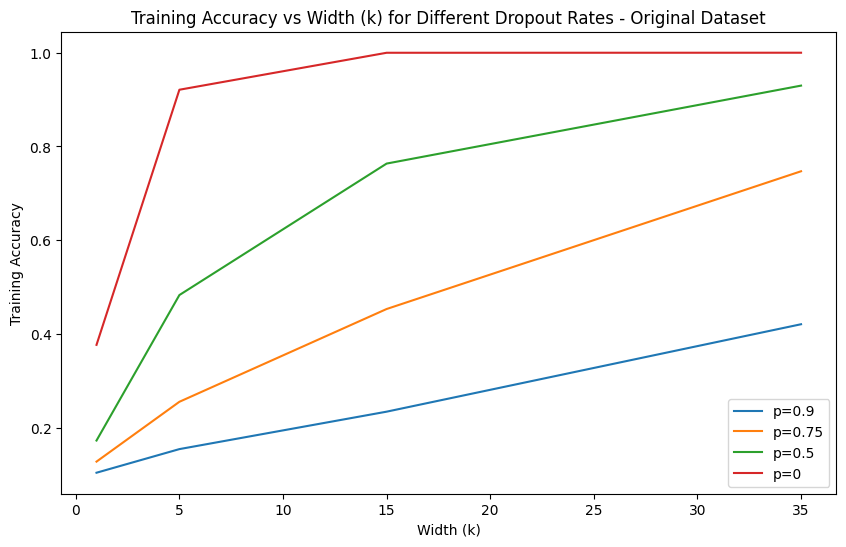

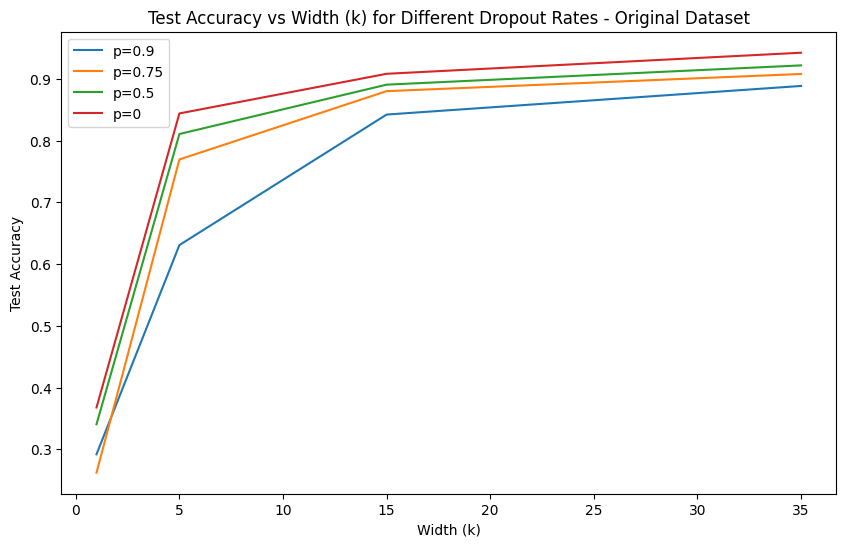

In [7]:
# Plotting results (original dataset)
# Plot training accuracy vs width (k) for different p on the same plot (original dataset)
plt.figure(figsize=(10, 6))
for p in dropout_grid:
    train_accuracies = [result['train_acc'] for result in results if result['p'] == p]
    plt.plot(width_grid, train_accuracies, label=f"p={p}")

plt.xlabel('Width (k)')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs Width (k) for Different Dropout Rates - Original Dataset')
plt.legend()
plt.show()

# Plot test accuracy vs width (k) for different p on the same plot (original dataset)
plt.figure(figsize=(10, 6))
for p in dropout_grid:
    test_accuracies = [result['val_acc'] for result in results if result['p'] == p]
    plt.plot(width_grid, test_accuracies, label=f"p={p}")

plt.xlabel('Width (k)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Width (k) for Different Dropout Rates - Original Dataset')
plt.legend()
plt.show()

## Noislized Y targeet


In [8]:
# Add noise to labels
def noisyY(labels, noise_ratio):
    num_noisy = int(len(labels) * noise_ratio)
    noisy_indices = np.random.choice(len(labels), num_noisy, replace=False)
    labels = labels.numpy()  # Convert tensor to numpy for easy manipulation
    for idx in noisy_indices:
        new_label = np.random.randint(0, 10)
        labels[idx] = tf.one_hot(new_label, depth=10)
    return tf.convert_to_tensor(labels, dtype=tf.float32)

# Add noise to the labels (50% noise), it is statiscally equal to 45% mislabeled data
y_train_noisy = noisyY(y_train, noise_ratio=0.5)

In [9]:
# Training models and storing final results (noisy dataset)
noisy_results = []
for p in dropout_grid:
    for k in width_grid:
        model = tf_NeuralNetwork(hidden_units=k, dropout_rate=p)
        model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(x_train, y_train_noisy, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
        final_train_acc = history.history['accuracy'][-1]
        final_val_acc = history.history['val_accuracy'][-1]
        noisy_results.append({'k': k, 'p': p, 'train_acc': final_train_acc, 'val_acc': final_val_acc})
        print(p, k, " th training done")


0.9 1  th training done
0.9 5  th training done
0.9 15  th training done
0.9 35  th training done
0.75 1  th training done
0.75 5  th training done
0.75 15  th training done
0.75 35  th training done
0.5 1  th training done
0.5 5  th training done
0.5 15  th training done
0.5 35  th training done
0 1  th training done
0 5  th training done
0 15  th training done
0 35  th training done


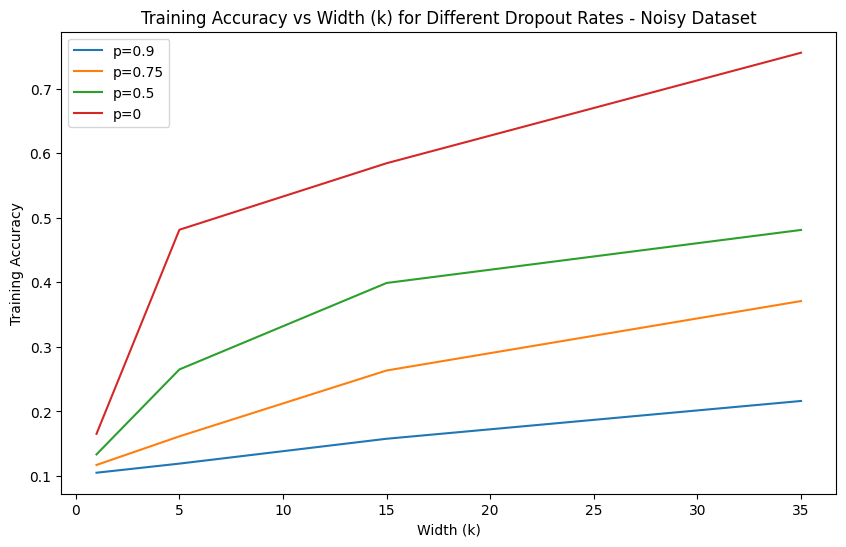

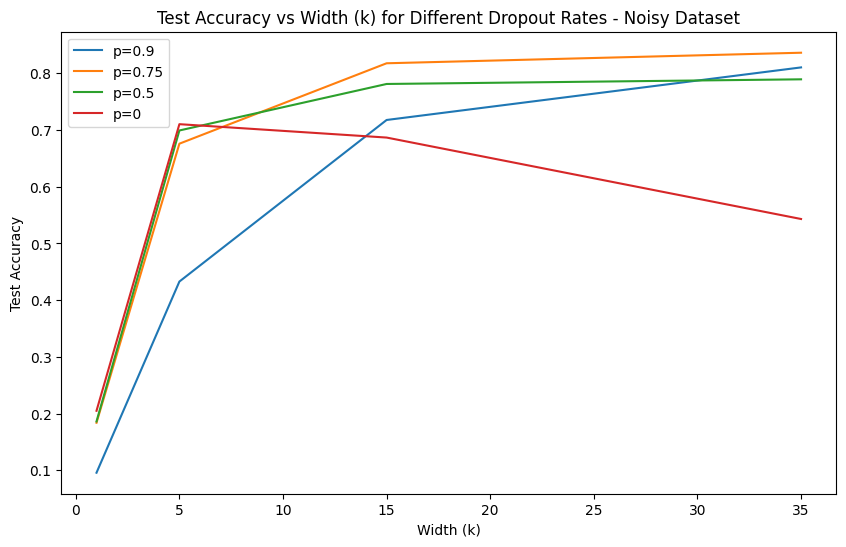

In [10]:
# Plotting results (noisy dataset)
# Plot training accuracy vs width (k) for different p on the same plot (noisy dataset)
plt.figure(figsize=(10, 6))
for p in dropout_grid:
    train_accuracies = [result['train_acc'] for result in noisy_results if result['p'] == p]
    plt.plot(width_grid, train_accuracies, label=f"p={p}")

plt.xlabel('Width (k)')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs Width (k) for Different Dropout Rates - Noisy Dataset')
plt.legend()
plt.show()

# Plot test accuracy vs width (k) for different p on the same plot (noisy dataset)
plt.figure(figsize=(10, 6))
for p in dropout_grid:
    test_accuracies = [result['val_acc'] for result in noisy_results if result['p'] == p]
    plt.plot(width_grid, test_accuracies, label=f"p={p}")

plt.xlabel('Width (k)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Width (k) for Different Dropout Rates - Noisy Dataset')
plt.legend()
plt.show()